In [1]:
print("hello")

hello


In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LloYsWd_aRPl7UYHJI5zrqGlOFOkW0EIyIrSuoa3kCDm',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'iris-donotdelete-pr-hmg5wjwa2ecmap'
object_key = 'Iris - Iris.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,Unnamed: 0,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.tail()  

,Unnamed: 0,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.tail()  

,Unnamed: 0,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.shape

(150, 6)

In [10]:
df.describe(include="object").T

,count,unique,top,freq
Species,150,3,Iris-setosa,50


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [12]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,150.0,NaN,NaN,NaN,75.5,43.445368,1.0,38.25,75.5,112.75,150.0
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

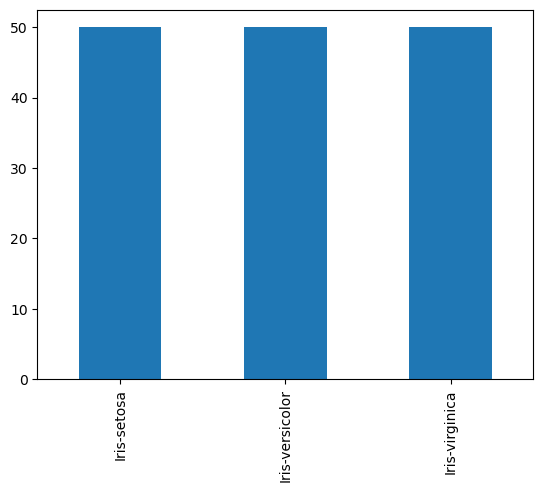

In [15]:
df["Species"].value_counts().plot.bar();

In [16]:
df.isnull()

,Unnamed: 0,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [17]:
df.isnull().sum()

Unnamed: 0       0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
len(df[df.duplicated()])    # or df.duplicated().sum()

0

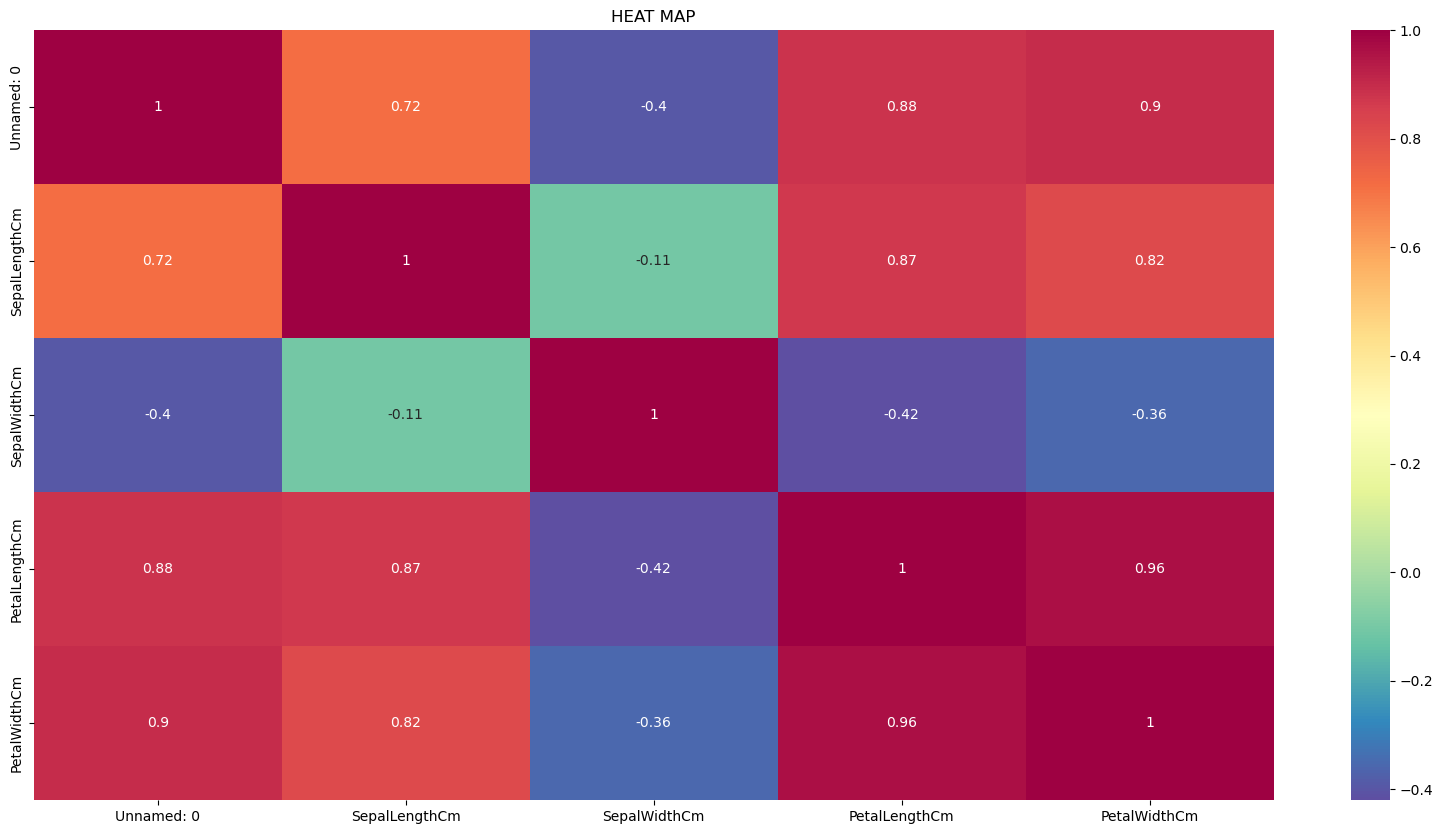

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
    
plt.figure(figsize= (20,10))
corelation= df.corr()
sns.heatmap(corelation, annot=True, cmap='Spectral_r')
plt.title("HEAT MAP")
plt.show()   

In [20]:
# creating dependent variable and independent variable
independendent_variable=df.drop(['Species'],axis=1)

dependent_variable=df['Species']

In [21]:
X=independendent_variable
y=dependent_variable

In [22]:
# spliting  unbalanced dataset  train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.20, random_state =17,stratify = y) 
print(X_train.shape)
print(X_test.shape)

(120, 5)
(30, 5)


In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [24]:
def print_metrics(actual, predicted):
  print('accuracy_score is {}'.format(accuracy_score(actual, predicted),average='weighted'))

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [26]:
lr= LogisticRegression()

In [27]:
# fitting logistic regression
param_grid = {'penalty':['l1','l2'], 'C' : [100,150,200] }

log_model= GridSearchCV(lr, param_grid, scoring = 'accuracy', cv =5)
log_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 150, 200], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [28]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds = log_model.predict(X_train)
y_test_class_preds = log_model.predict(X_test)

In [29]:
# Evaluation of training model
print_metrics(y_train,y_train_class_preds)

accuracy_score is 1.0


In [30]:
# Evaluation of testing model
print_metrics(y_test,y_test_class_preds)

accuracy_score is 1.0
